# 30 Day Map Challenge – Day 1: Points 🗺️

This notebook is part of the **#30DayMapChallenge** (Day 1: Points).  
The dataset contains the location of schools in Spain.  

We will use **GeoPandas**, **Matplotlib**, and **Contextily** to:
- Load the shapefile of schools
- Explore the dataset
- Visualize all schools as points on a map of Spain

In [116]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [117]:
educ_centers  = gpd.read_file('centros_educativos.shp')
com_autonomas = gpd.read_file('ll_autonomicas_inspire_peninbal_etrs89.shp')
educ_centers.head()

,OBJECTID,Gestion,Tipo,Nombre,Municipio,Direccion,CodigoPost,Fuente,geometry
0,81.0,Concertado,None,ORG Berriozar Lantxotegi,Berriozar,"Calle San Esteban, 3",31013,Oficial,POINT (608713.34 4744340.66)
1,102.0,Público,None,EI Burlada Egunsenti,Burlada / Burlata,"Plaza Vicente Girones Bombay, 1",31600,Oficial,POINT (613073.67 4742057.26)
2,116.0,Concertado,None,ORG Cascante La Ribera,Cascante,"Avenida la Constitución, 13",31520,Oficial,POINT (609773.98 4650023.25)
3,136.0,Público,None,EI Corella Niño Jesús,Corella,"Avenida Villar, 1",31591,Oficial,POINT (599906.92 4663053.69)
4,163.0,Público,None,CAP Estella,Estella-Lizarra,"Calle Remontival, 7",31200,Oficial,POINT (578728 4725079)


#### Check the CRS of both layers:

In [118]:
print(f"CRS of com_autonom layer {com_autonomas.crs}")
print(f"CRS of educative_centers layer {educ_centers.crs}")

CRS of com_autonom layer EPSG:4258
CRS of educative_centers layer None


In [119]:
educ_centers = educ_centers.set_crs(epsg=25830, allow_override=True)

In [120]:
educ_centers = educ_centers.to_crs(epsg=3857)
com_autonomas = com_autonomas.to_crs(epsg=3857)

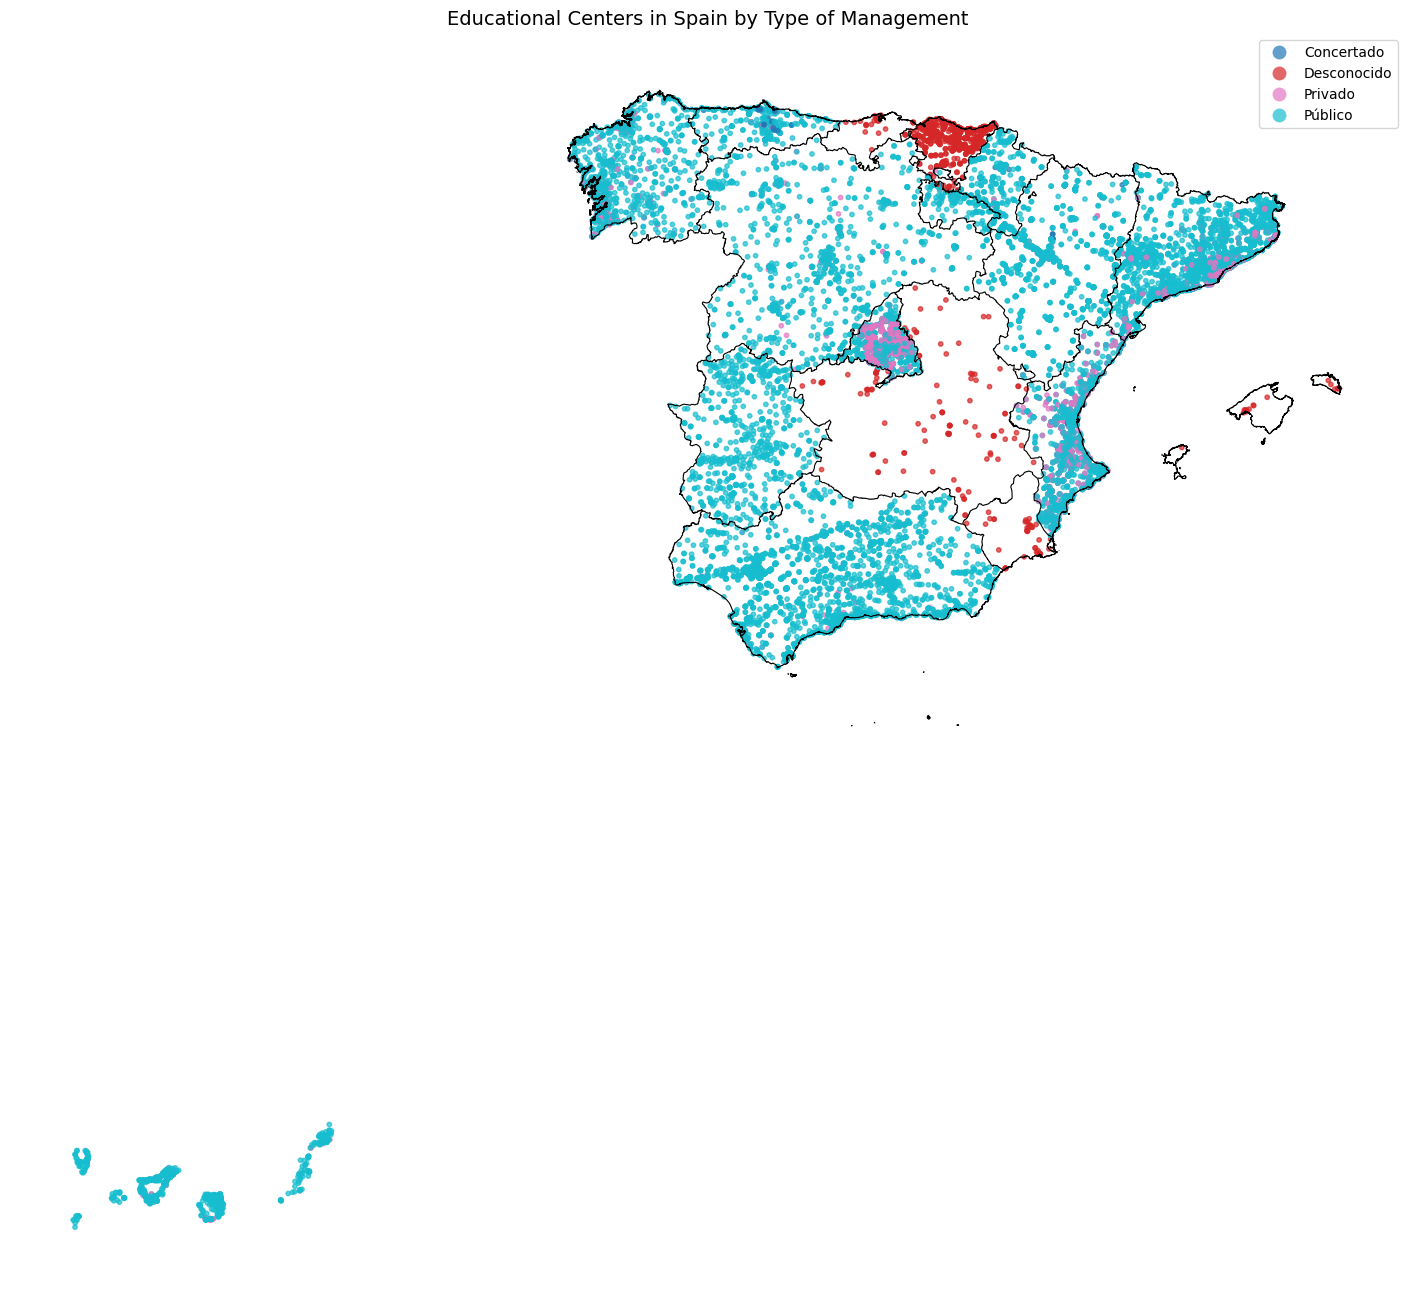

In [123]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


# --- Plot ---
fig, ax = plt.subplots(figsize=(18, 20))

educ_centers["Gestion"] = educ_centers["Gestion"].fillna("Desconocido")

# Polígonos: comunidades autónomas
com_autonomas.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)

# Puntos: centros educativos por tipo de gestión
educ_centers.plot(
    ax=ax,
    column="Gestion",         # Coloreamos según gestión
    categorical=True,
    legend=True,
    markersize=10,
    alpha=0.7
)



# Ajustamos
ax.set_axis_off()
ax.set_title("Educational Centers in Spain by Type of Management", fontsize=14)

plt.show()


In [62]:
# --- 1. Filter the Data using Geometry Coordinates ---
# Define approximate coordinate boundaries for the mainland
# These values are typical for UTM Zone 30N/31N. You might need slight adjustments.

# Threshold: Schools to the SW (smaller X and smaller Y) are likely in the Canaries.
# Set a generous minimum X and Y for the mainland to exclude the islands.
# Example values (adjust if they don't work perfectly):
MIN_X_MAINLAND = 500000  # Minimum Easting (X) for the mainland
MIN_Y_MAINLAND = 4000000 # Minimum Northing (Y) for the mainland

# Separate the GeoDataFrame
# NOTE: We use .x and .y accessors on the geometry column
canarias_data = educ_centers[
    (educ_centers.geometry.x < MIN_X_MAINLAND) & 
    (educ_centers.geometry.y < MIN_Y_MAINLAND)
]

peninsula_data = educ_centers.drop(canarias_data.index)

print(f"Schools in Canary Islands: {len(canarias_data)}")
print(f"Schools in Peninsula/Balearics: {len(peninsula_data)}")

Schools in Canary Islands: 1337
Schools in Peninsula/Balearics: 25269


In [64]:
educ_centers.head()

,OBJECTID,Gestion,Tipo,Nombre,Municipio,Direccion,CodigoPost,Fuente,geometry
0,81.0,Concertado,None,ORG Berriozar Lantxotegi,Berriozar,"Calle San Esteban, 3",31013,Oficial,POINT (608713.34 4744340.66)
1,102.0,Público,None,EI Burlada Egunsenti,Burlada / Burlata,"Plaza Vicente Girones Bombay, 1",31600,Oficial,POINT (613073.67 4742057.26)
2,116.0,Concertado,None,ORG Cascante La Ribera,Cascante,"Avenida la Constitución, 13",31520,Oficial,POINT (609773.98 4650023.25)
3,136.0,Público,None,EI Corella Niño Jesús,Corella,"Avenida Villar, 1",31591,Oficial,POINT (599906.92 4663053.69)
4,163.0,Público,None,CAP Estella,Estella-Lizarra,"Calle Remontival, 7",31200,Oficial,POINT (578728 4725079)


In [65]:
com_autonomas.head()

,INSPIREID,NATIONALCO,COUNTRY,NATLEV,NATLEVNAME,LEGSTATUS,ACCURACY,NAME_BOUND,DATE_BOUND,URL_RESOUR,geometry
0,ES.IGN.BDDAE.M34100000000M98990000000T0243513,M34100000000M98990000000T0243513,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,None,None,Comunitat Valenciana#Mar Mediterráneo,2022-09-12,https://www.idee.es/csw-inspire-idee/srv/spa/c...,"LINESTRING (0.23009 38.75345, 0.22999 38.75348..."
1,ES.IGN.BDDAE.M34040000000M98990000000T0227757,M34040000000M98990000000T0227757,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,None,None,Illes Balears#Mar Mediterráneo,2009-07-06,https://www.idee.es/csw-inspire-idee/srv/spa/c...,"LINESTRING (2.58686 39.52759, 2.58693 39.5276,..."
2,ES.IGN.BDDAE.M34120000000M97990000000T0225175,M34120000000M97990000000T0225175,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,None,None,Galicia#Océano Atlántico,2009-07-06,https://www.idee.es/csw-inspire-idee/srv/spa/c...,"LINESTRING (-7.76544 43.73989, -7.76538 43.739..."
3,ES.IGN.BDDAE.M34120000000M97990000000T0225176,M34120000000M97990000000T0225176,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,None,None,Galicia#Océano Atlántico,2009-07-06,https://www.idee.es/csw-inspire-idee/srv/spa/c...,"LINESTRING (-7.76711 43.73939, -7.76697 43.739..."
4,ES.IGN.BDDAE.M34120000000M97990000000T0225711,M34120000000M97990000000T0225711,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,None,None,Galicia#Océano Atlántico,2009-07-06,https://www.idee.es/csw-inspire-idee/srv/spa/c...,"LINESTRING (-9.03711 43.20568, -9.03719 43.205..."


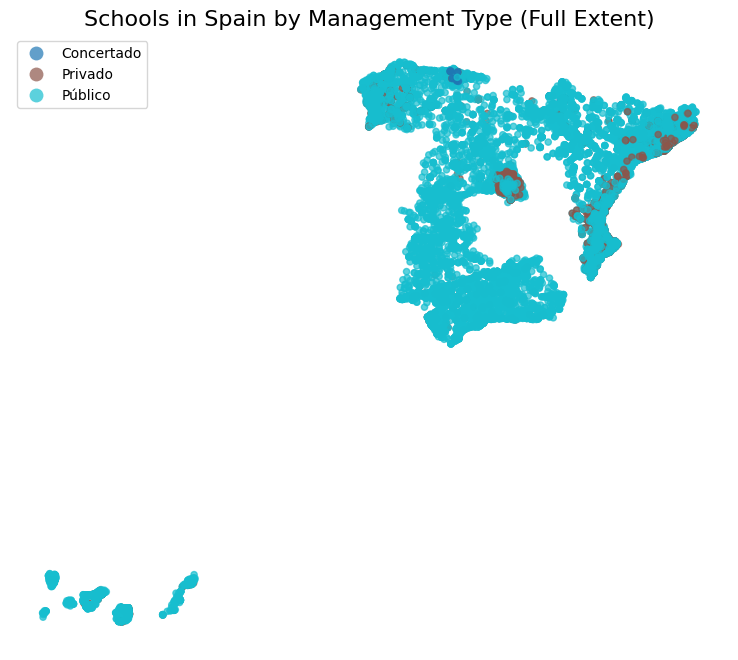

In [72]:
import matplotlib.pyplot as plt
import geopandas as gpd 

# -----------------------------------------------------------------
# 1. ESTABLECER Y APLICAR EL CRS COMÚN (CRUCIAL)
# -----------------------------------------------------------------
TARGET_CRS = "EPSG:25830" 
comunidades_autonomas = comunidades_autonomas.to_crs(TARGET_CRS)

# -----------------------------------------------------------------
# 2. PLOTEO CON TODAS LAS CAPAS EN UN SOLO MAPA
# -----------------------------------------------------------------

fig, ax = plt.subplots(figsize=(12, 8)) 

# --- 1. Capa de Comunidades Autónomas (FONDO) ---
# comunidades_autonomas.plot(
#     ax=ax, 
#     facecolor="#ececec", 
#     edgecolor="white", 
#     linewidth=0.5, 
#     zorder=1,
#     aspect="equal" # <--- ¡Añade esto aquí!
# )

# --- 2. Capa de Colegios (PUNTOS) ---
educ_centers.plot(
   ax=ax,
   column="Gestion",
   categorical=True,
   legend=True,
   markersize=20,
   alpha=0.7,
   zorder=2,
   aspect="equal" # <--- ¡Y aquí también!
)

ax.set_title("Schools in Spain by Management Type (Full Extent)", fontsize=16)
ax.axis("off")

plt.show()

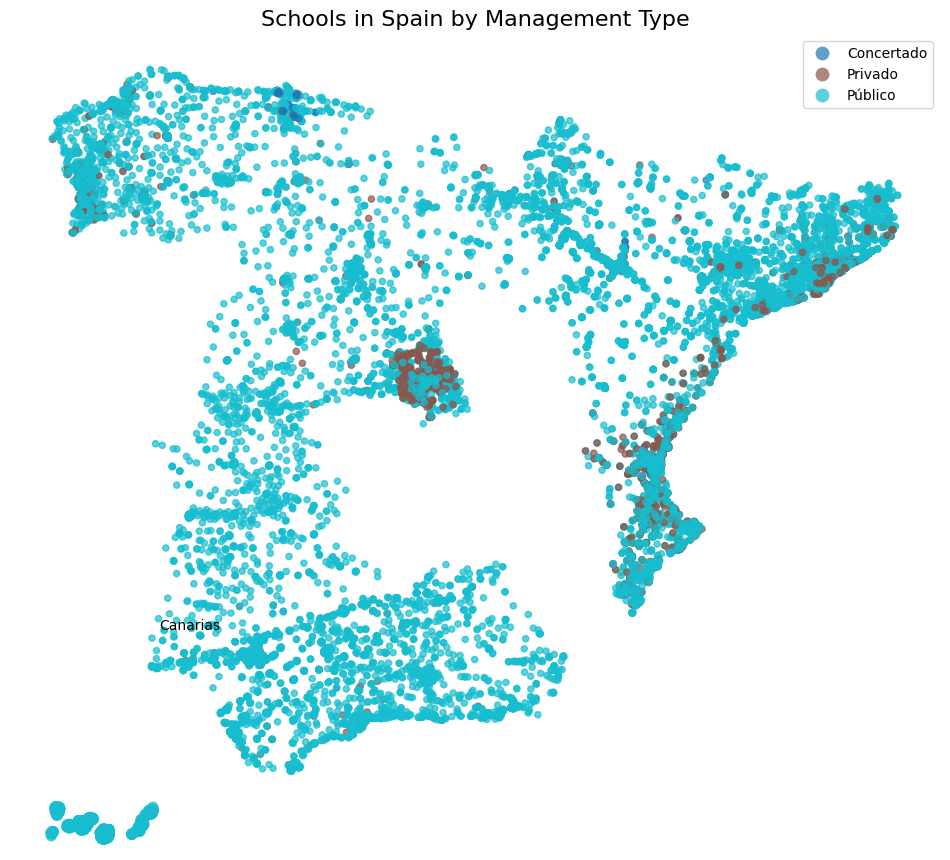

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

# -------------------------------------------------------------
# 1. Crear el eje Inset (cuadro pequeño)
ax_inset = fig.add_axes([0.15, 0.1, 0.25, 0.25])
# -------------------------------------------------------------

# --- A. Plotear la PENÍNSULA en el eje principal (ax) ---
peninsula_data.plot(
    ax=ax,
    column="Gestion",
    categorical=True,
    legend=True,
    markersize=20,
    alpha=0.7
)
ax.set_title("Schools in Spain by Management Type", fontsize=16)
ax.axis("off")


# --- B. Plotear CANARIAS en el eje inset (ax_inset) ---
canarias_data.plot(
    ax=ax_inset,
    column="Gestion",
    categorical=True,
    legend=False,  
    markersize=50, 
    alpha=0.7
)

# -------------------------------------------------------------
# 2. CALCULAR LÍMITES CON PADDING
# Obtener los límites exactos de los puntos de datos de Canarias
minx, miny, maxx, maxy = canarias_data.total_bounds

# Definir el padding (buffer) en unidades de coordenada.
# Un valor de 50,000 suele ser un buen punto de partida para UTM.
PADDING = 50000 

# Establecer los límites del Inset añadiendo el padding
ax_inset.set_xlim([minx - PADDING, maxx + PADDING])
ax_inset.set_ylim([miny - PADDING, maxy + PADDING])
# -------------------------------------------------------------

# Estética del Inset
ax_inset.set_title("Canarias", fontsize=10)
ax_inset.axis("off") # Ocultar ejes del inset para que parezca un mapa

plt.show()

In [43]:
comunidades_autonomas = com_autonomas